Loading qcodes stuff

QUA documentation

https://qm-docs.qualang.io/guides/features.html

In [1]:
# -*- coding: utf-8 -*-
"""
Created on March 3. 2022

@author: TR, RK, ER
"""
import matplotlib.pyplot as plt
import numpy as np

import tempfile
import os
from time import sleep, monotonic

import qcodes as qc
from qcodes import Station, load_or_create_experiment, initialise_database, Measurement, load_by_run_spec, load_by_id
from qcodes.dataset.plotting import plot_dataset, plot_by_id
from qcodes.utils.dataset.doNd import do0d,do1d, do2d
qc.config.dataset.dond_plot = True

lib_dir = tempfile.gettempdir()
database_name = 'test' #database name file. Look at cell below for its location+

dir_database = tempfile.gettempdir()
database_format = '.db'
database_path = os.path.join(dir_database, database_name + database_format)

qc.config.user.mainfolder = os.path.join(dir_database, database_name) #saves plots in png and pdf in the database folder
qc.logger.start_all_logging()
station = qc.Station()

qc.initialise_or_create_database_at(database_path) 
exp = load_or_create_experiment(
    experiment_name= 'Test',
    sample_name="test"
)

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\T7-2\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\T7-2\.qcodes\logs\220316-15048-qcodes.log


In [2]:
from qmachine.qmachine import QMachine
myqm = QMachine(name='Bla', host='192.168.15.128', port=80)

2022-03-16 16:34:04,403 - qm - INFO - Performing health check
2022-03-16 16:34:04,407 - qm - INFO - Health check passed


In [14]:
myqm.run_dumbpulse()
myqm.get_pulse()

2022-03-17 10:22:45,621 - qm - INFO - Flags: 
2022-03-17 10:22:45,626 - qm - INFO - Sending program to QOP
2022-03-17 10:22:45,943 - qm - INFO - Executing program


array([0.03644371])

In [15]:
myqm.job.is_paused()

False

In [16]:
myqm.get_pulse()

_InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.UNKNOWN
	details = ""
	debug_error_string = "{"created":"@1647508975.175000000","description":"Error received from peer ipv4:192.168.15.128:80","file":"src/core/lib/surface/call.cc","file_line":904,"grpc_message":"","grpc_status":2}"
>

Starting experimental run with id: 3. Using 'qcodes.utils.dataset.doNd.do0d'
2022-03-16 16:35:04,036 - qm - INFO - Flags: 
2022-03-16 16:35:04,038 - qm - INFO - Sending program to QOP
2022-03-16 16:35:04,681 - qm - INFO - Executing program


(results #3@C:\Users\T7-2\AppData\Local\Temp\test.db
 ---------------------------------------------------
 Bla_x_axis - array
 Bla_y_axis - array
 Bla_scan2d - array,
 [<AxesSubplot:title={'center':'Run #3, Experiment Test (test)'}, xlabel='X Axis (Hz)', ylabel='Y Axis (Hz)'>],
 [<matplotlib.colorbar.Colorbar at 0x26bfe771450>])

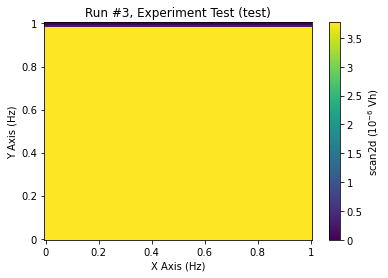

In [6]:
do0d(myqm.scan2d, do_plot = True)

In [9]:
myqm.run_dumbpulse()

2022-03-16 15:01:19,209 - qm - INFO - Flags: 
2022-03-16 15:01:19,211 - qm - INFO - Sending program to QOP
2022-03-16 15:01:19,337 - qm - INFO - Executing program


In [19]:
myqm.job.resume()
myqm.job.is_paused()

True

In [6]:
myqm.job.is_paused()

False

In [5]:
myqm.get_pulse()

2022-03-16 16:32:22,108 - qm - INFO - Flags: 
2022-03-16 16:32:22,110 - qm - INFO - Sending program to QOP
2022-03-16 16:32:22,237 - qm - INFO - Executing program


array([0.03639531])

In [7]:
import numpy as np
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [21]:
myqm.scan2d.get()

2022-03-16 16:29:05,281 - qm - INFO - Flags: 
2022-03-16 16:29:05,281 - qm - INFO - Sending program to QOP
2022-03-16 16:29:05,535 - qm - INFO - Executing program


array([[3.76868813e-06, 3.76862683e-06, 3.76871387e-06, ...,
        3.76863229e-06, 2.59982544e-07, 4.41347077e-15],
       [3.76860426e-06, 3.76865183e-06, 3.76864308e-06, ...,
        3.76861954e-06, 2.59911242e-07, 2.76756807e-15],
       [3.76867926e-06, 3.76851489e-06, 3.76852340e-06, ...,
        3.76858951e-06, 2.59986759e-07, 3.27859537e-15],
       ...,
       [3.76852718e-06, 3.76877861e-06, 3.76857949e-06, ...,
        3.76872376e-06, 2.59943248e-07, 9.27910932e-16],
       [3.76858332e-06, 3.76845716e-06, 3.76854061e-06, ...,
        3.76843977e-06, 2.59975502e-07, 2.30770215e-15],
       [3.76862911e-06, 3.76861272e-06, 3.76876351e-06, ...,
        3.76864631e-06, 2.59973322e-07, 7.37104986e-15]])

In [8]:
import numpy as np
np.zeros((100, 100)).shape

(100, 100)

In [6]:
STATION = qc.Station(config_file='F:/qcodes_local/FF1A_2022/220217_reflectometry/20220210_Config.yaml',use_monitor='True')


In [5]:
qdac=STATION.load_instrument('qdac_A', revive_instance=False)

2022-03-08 16:26:27,575 ¦ py.warnings ¦ WARNING ¦ warnings ¦ _showwarnmsg ¦ 110 ¦ C:\Users\T7\miniconda3\envs\qcodes\lib\site-packages\qcodes\station.py:573: QCoDeSDeprecationWarning: The use of a comma separated string for the limits keyword is deprecated. Use "an array like "[lower_lim, upper_lim]"" as an alternative.
  alternative='an array like "[lower_lim, upper_lim]"',



In [7]:
agi=STATION.load_instrument('keysight_A', revive_instance=True)


def agi_get():
    return agi.volt()*1e-7*-1

curr = qc.Parameter(name='CURR_31',label='CURR_31',unit='A',get_cmd=agi_get)

Connected to: Keysight Technologies 34465A (serial:MY57512797, firmware:A.03.00-02.40-03.00-00.52-04-01) in 0.12s


In [8]:
#Loading attenuater
st_att = STATION.load_instrument('step_att_1', revive_instance=True)
#Setting attenuation to 38 which seems to be the optimum
st_att.attenuation(38)

2022-03-08 16:26:43,211 ¦ qcodes.instrument.base ¦ WARNING ¦ base ¦ snapshot_base ¦ 259 ¦ [step_att_1(RCDAT_6000_60)] Snapshot: Could not update parameter: attenuation
2022-03-08 16:26:43,224 ¦ qcodes.instrument.base ¦ WARNING ¦ base ¦ snapshot_base ¦ 259 ¦ [step_att_1(RCDAT_6000_60)] Snapshot: Could not update parameter: hop_points


Connected to: Mini-Circuits  (serial:MN=RCDAT-6000-60, firmware:SN=11908290032) in 0.03s


Loading OPX

In [2]:
from qmachine.config import *
from qm.qua import *
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm import SimulationConfig
import time as time
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np


qmm = QuantumMachinesManager(host='192.168.15.128',port=80)
qmm.close_all_quantum_machines()
qm = qmm.open_qm(config)


2022-03-15 17:23:57,038 - qm - INFO - Performing health check
2022-03-15 17:23:57,045 - qm - INFO - Health check passed


Pulse where we want to vary something else

In [11]:
with program() as dumbpulse:
    n = declare(int)
    I = declare(fixed)
    Q = declare(fixed)
    I_stream = declare_stream()
    Q_stream = declare_stream()

    with for_(n,0,n<100,n+1):
        measure('readout_pulse_0_2', 'Q1_readout', None, demod.full('cos', I), demod.full('sin', Q))

        save(I, I_stream)
        save(Q, Q_stream)
                

    with stream_processing():
        I_stream.buffer(1).average().save('I')
        Q_stream.buffer(1).average().save('Q')

def run_pulse():
    job = qm.execute(dumbpulse)
    I_handle = job.result_handles.get('I')
    Q_handle = job.result_handles.get('Q')
    Q_handle.wait_for_all_values()
    I_handle.wait_for_all_values()
    results_I = I_handle.fetch_all()
    results_Q = Q_handle.fetch_all()
    job.halt()
    return results_I**2 + results_Q**2
   
 
pulse_meas = qc.Parameter(name='pulse_meas',label='pulse_meas',unit='Vh',get_cmd=run_pulse)

this is how we might do a measurement where we change something else a lot inbewtween OPX measurements

Starting experimental run with id: 698. Using 'qcodes.utils.dataset.doNd.do2d'
2022-03-08 16:29:50,418 - qm - INFO - Flags: 
2022-03-08 16:29:50,419 - qm - INFO - Sending program to QOP
2022-03-08 16:29:50,488 - qm - INFO - Executing program
2022-03-08 16:29:50,800 - qm - INFO - Flags: 
2022-03-08 16:29:50,801 - qm - INFO - Sending program to QOP
2022-03-08 16:29:50,867 - qm - INFO - Executing program
2022-03-08 16:29:51,199 - qm - INFO - Flags: 
2022-03-08 16:29:51,200 - qm - INFO - Sending program to QOP
2022-03-08 16:29:51,266 - qm - INFO - Executing program
2022-03-08 16:29:51,619 - qm - INFO - Flags: 
2022-03-08 16:29:51,620 - qm - INFO - Sending program to QOP
2022-03-08 16:29:51,699 - qm - INFO - Executing program
2022-03-08 16:29:52,016 - qm - INFO - Flags: 
2022-03-08 16:29:52,017 - qm - INFO - Sending program to QOP
2022-03-08 16:29:52,097 - qm - INFO - Executing program
2022-03-08 16:29:52,422 - qm - INFO - Flags: 
2022-03-08 16:29:52,424 - qm - INFO - Sending program to QOP

(results #698@F:\database\FF1A_2022.db
 -------------------------------------
 qdac_A_BNC36 - numeric
 qdac_A_BNC29 - numeric
 pulse_meas - numeric,
 [<AxesSubplot:title={'center':'Run #698, Experiment T7 (FF1A)'}, xlabel='BNC36 (mV)', ylabel='BNC29 (mV)'>],
 [<matplotlib.colorbar.Colorbar at 0x183274b4848>])

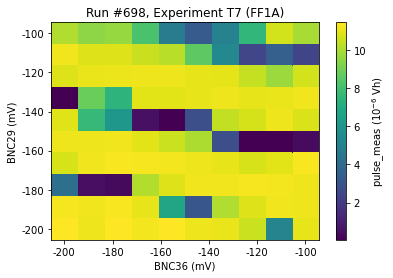

In [13]:
do2d(qdac.BNC36, -0.1, -0.2, 10, 0.01, qdac.BNC29, -0.1, -0.2, 10, 0.01, pulse_meas)

The data should just show the thing in action, note that it takes about 40s to do a 10x10 plot. the pause function in OPX might be a way through this issue

Saving data from the OPX

In [3]:
# Defining the 2dscan RBCH


#job.halt()

ramp_time = 10e3//4  #//4 turns ns into clock cycles
sweep_width = 50  #mV
attenuation_L12 = 8.891
rate = (sweep_width*attenuation_L12)*1e-3/(4*ramp_time)

num_of_slices = 100
slice_length = int(ramp_time//num_of_slices)

da = 0.01


with program() as twodscan:
    #From here
    a = declare(fixed)
    n = declare(int)
    I = declare(fixed, size=num_of_slices)
    Q = declare(fixed, size=num_of_slices)
    I_stream = declare_stream()
    Q_stream = declare_stream()
    i = declare(int)

    with for_(n, 0, n<2e3, n+1):  #number of averages
        with for_(a, 0.0, a < 1.0 - da*0.5, a + da):  #adding the '- da*0.5 ' makes it unequivocal that the last value is not included. this is important for looping over fixed/floating values. *0.5 is way faster than /2, as division adds a 400ns overhead.
            # reset_phase('Q1_readout')  #legacy
            play('CW'*amp(a), 'Q1_L', duration=ramp_time)
            #wait(500, 'Q1_R')  #legacy
            #wait(500, 'Q1_readout')  #legacy
            play(ramp(rate), 'Q1_R', duration=ramp_time)
            measure('readout_pulse_0_2', 'Q1_readout', None, demod.sliced('cos', I, slice_length, 'out1'), demod.sliced('sin', Q, slice_length, 'out1'))
            with for_(i, 0, i<num_of_slices, i+1):
                save(I[i], I_stream)
                save(Q[i], Q_stream)
            #wait(4000)  #legacy
            

    with stream_processing():
        I_stream.buffer(100,100).average().save('I')
        Q_stream.buffer(100,100).average().save('Q')
    
    #to here could be defined as a macro. they are indeed identical to python functions

In [5]:
#Generating data/measuring

def scan2d(now):
    if now == True:
        job = qm.execute(twodscan)
        I_handle = job.result_handles.get('I')
        Q_handle = job.result_handles.get('Q')
        I_handle.wait_for_all_values()
        Q_handle.wait_for_all_values()
        results_I = I_handle.fetch_all()
        results_Q = Q_handle.fetch_all()
        return results_I, results_Q


In [6]:


#the results_I and results_Q are our data
results_I, results_Q = scan2d(True)

2022-03-15 17:27:20,742 - qm - INFO - Flags: 
2022-03-15 17:27:20,744 - qm - INFO - Sending program to QOP
2022-03-15 17:27:21,059 - qm - INFO - Executing program


Note that this is a 100x100 measurement taken 2000 times in 12.1s. this is the speed we like.

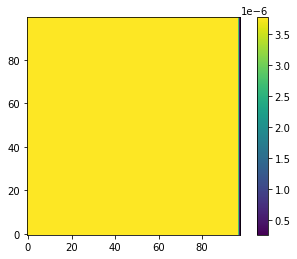

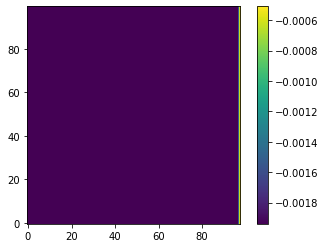

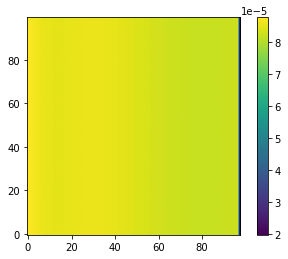

In [7]:
amplitude = results_I**2 + results_Q**2

plt.figure()
plt.imshow(amplitude[:,1:-1],origin='lower')
plt.colorbar()


plt.figure()
plt.imshow(results_I[:,1:-1],origin='lower')
plt.colorbar()


plt.figure()
plt.imshow(results_Q[:,1:-1],origin='lower')
plt.colorbar()


Above we plotted the data. We're measuring a too small area of the voltage space compared to what we want ((50mV)**2 instead of the full (1V)**2). Being able to tile these plots would be great. here the fast reloading of a job is not so crucial, since the measurement execution is the bottleneck here.